# 3次元標準ガウス分布を2次元に写す前後の関係の考察

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
size = 1000
mean = [0,0,0]
cov = [[1,0,0],
        [0,1,0],
        [0,0,1]]

In [3]:
Z = np.random.multivariate_normal(mean, cov, size)

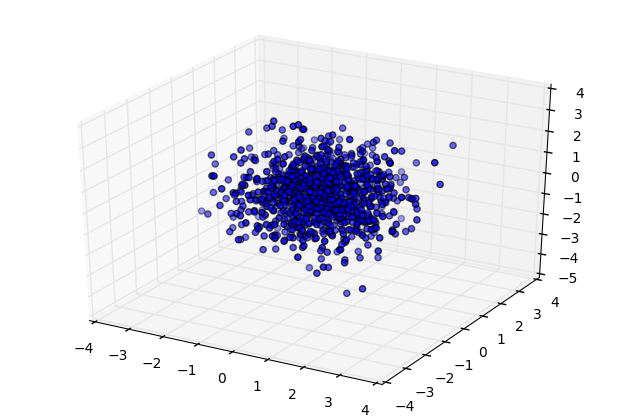

In [4]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(Z[:,0], Z[:,1], Z[:,2])

In [5]:
W = [[7,3,0],
     [0,2,1]]
WZ = []
for i in xrange(len(Z)):
    WZ.append(list(np.dot(W,Z[i])))

In [16]:
cov_WZ = np.cov(WZ, rowvar=0, bias=1)
la, v = np.linalg.eig(cov_WZ)
print u"共分散行列の固有ベクトル\n",v[:,0],"と\n",v[:,1]
print u"共分散行列の固有値\n",la

U, s, V = np.linalg.svd(W, full_matrices=True)
print "\n"
print u"V is\n",V
print u"U is\n",U
print u"diag(sigma) is\n",s

共分散行列の固有ベクトル
[ 0.99454201  0.10433688] と
[-0.10433688  0.99454201]
共分散行列の固有値
[ 55.27931408   4.49399939]


V is
[[-0.90821818 -0.41824556 -0.0145046 ]
 [-0.37377354  0.79508318  0.47763592]
 [ 0.18823674 -0.43921906  0.87843813]]
U is
[[-0.99380916 -0.11110063]
 [-0.11110063  0.99380916]]
diag(sigma) is
[ 7.65968383  2.08068346]


In [7]:
L = np.linalg.cholesky(cov_WZ)
L

array([[ 7.39773315,  0.        ],
       [ 0.71236154,  2.13058647]])

上の結果から分布変換後の共分散行列の固有ベクトルは特異値分解の出力空間の正規直交基底に、   
また共分散行列の固有値は特異値分解の対角行列の各成分と平方により近い値で対応していることが予想される(数式より)

In [8]:
"""
print "Z = \n",Z[0]
print "VZ = \n",np.dot(V,Z[0])
print "sVZ = \n",np.dot(np.hstack((np.diag(s),np.array([[0],[0]]))),np.dot(V,Z[0]))
print "UsVZ = \n",np.dot(U,np.dot(np.hstack((np.diag(s),np.array([[0],[0]]))),np.dot(V,Z[0])))
"""

'\nprint "Z = \n",Z[0]\nprint "VZ = \n",np.dot(V,Z[0])\nprint "sVZ = \n",np.dot(np.hstack((np.diag(s),np.array([[0],[0]]))),np.dot(V,Z[0]))\nprint "UsVZ = \n",np.dot(U,np.dot(np.hstack((np.diag(s),np.array([[0],[0]]))),np.dot(V,Z[0])))\n'

二次元に変換された分布をplotし、その共分散行列の固有ベクトルを描写

固有ベクトルはそれぞれ次の行列の各列ベクトル
[[ 0.99454201 -0.10433688]
 [ 0.10433688  0.99454201]]


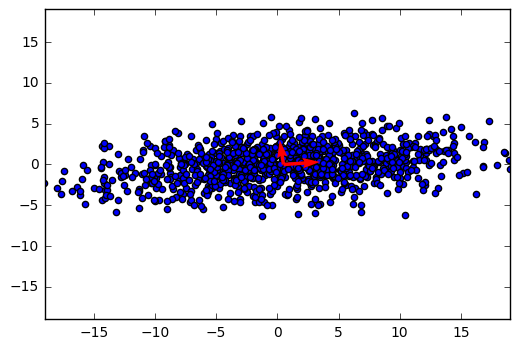

In [9]:
np.array(WZ)
plt.scatter(np.array(WZ)[:,0],np.array(WZ)[:,1])
plt.quiver(np.mean(np.array(WZ)[:,0]),np.mean(np.array(WZ)[:,1]),
           3*v[:,0][0],3*v[:,0][1],angles='xy',scale_units='xy',scale=1,color="red")
plt.quiver(np.mean(np.array(WZ)[:,0]),np.mean(np.array(WZ)[:,1]),
           3*v[:,1][0],3*v[:,1][1],angles='xy',scale_units='xy',scale=1,color="red")
plt.xlim(-19,19)
plt.ylim(-19,19)
print u"固有ベクトルはそれぞれ次の行列の各列ベクトル\n",v

最後に生成分布Zと変換後分布WZを三次元空間にplotし、視覚的な関係性を調べた

<IPython.core.display.Javascript object>


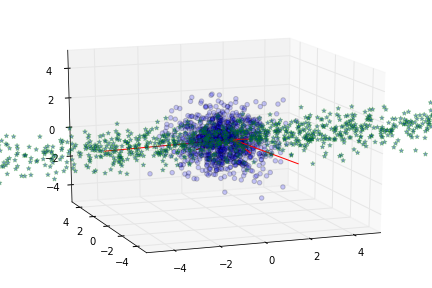

(-5, 5)

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
%matplotlib notebook

fig2 = plt.figure()
ax2 = Axes3D(fig2)
ax2.scatter(Z[:,0], Z[:,1], Z[:,2],alpha=0.2)
ax2.scatter(np.array(WZ)[:,0],np.array(WZ)[:,1],0,color="green", marker="*",alpha=0.4)
ax2.quiver(np.mean(np.array(WZ)[:,0]),np.mean(np.array(WZ)[:,1]),0,
           v[:,0][0],v[:,0][1],0,color="red",length=6)
ax2.quiver(np.mean(np.array(WZ)[:,0]),np.mean(np.array(WZ)[:,1]),0,
           v[:,1][0],v[:,1][1],0,color="red",length=6)
ax2.set_xlim(-5,5)
ax2.set_ylim(-5,5)
ax2.set_zlim(-5,5)

### おまけ
二次元に移った点を定理3.3を用いて標準ガウス分布に従わせた

In [10]:
L = np.linalg.cholesky(cov_WZ)
np.mean(np.array(WZ)[:,0])
np.mean(np.array(WZ)[:,1])

0.0054250274449040925

In [11]:
zz = []
for i in xrange(len(WZ)):
    z = np.dot(np.linalg.inv(L),
               (np.array(WZ[i])-np.array([np.mean(np.array(WZ)[:,0]),np.mean(np.array(WZ)[:,1])])))
    zz.append(list(z))

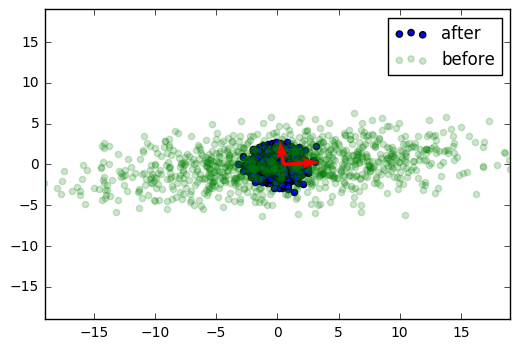

In [12]:
%matplotlib inline
zz = np.array(zz)
plt.scatter(zz[:,0],zz[:,1],label="after")

plt.scatter(np.array(WZ)[:,0],np.array(WZ)[:,1],color="green",alpha=0.2,label="before")
plt.quiver(np.mean(np.array(WZ)[:,0]),np.mean(np.array(WZ)[:,1]),
           3*v[:,0][0],3*v[:,0][1],angles='xy',scale_units='xy',scale=1,color="red")
plt.quiver(np.mean(np.array(WZ)[:,0]),np.mean(np.array(WZ)[:,1]),
           3*v[:,1][0],3*v[:,1][1],angles='xy',scale_units='xy',scale=1,color="red")
plt.xlim(-19,19)
plt.ylim(-19,19)
plt.legend()